In [30]:
# Markdown in this area required

In [31]:
#Importing the required packages and getting the xlsx file
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
from scipy.stats import chi2_contingency as chitest
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.tree import DecisionTreeRegressor

#Storing the file path in our desktop
file_path = '~/Desktop/CompleteDataAnalysis/Champo.xlsx'

In [32]:
# We can print all of our sheet names after traversing through the xlsx file
xls = pd.ExcelFile(file_path)
print(xls.sheet_names)

['Copyright @ IIMB', 'Raw Data-Order and Sample', 'Data Order ONLY', 'Data on Sample ONLY', 'Data for Recommendation', 'Data for Clustering', 'Data - Association Rules A-11 ']


In [33]:
#Loading all of our sheets data into seperate variables

RawDataOrder = pd.read_excel(file_path, sheet_name = 'Raw Data-Order and Sample')
DataOrderOnly = pd.read_excel(file_path, sheet_name = 'Data Order ONLY')
DataOnSampleOnly = pd.read_excel(file_path, sheet_name = 'Data on Sample ONLY')
RecommendationData = pd.read_excel(file_path, sheet_name = 'Data for Recommendation')
ClusteringData = pd.read_excel(file_path, sheet_name = 'Data for Clustering')
AssocRulesData = pd.read_excel(file_path, sheet_name = 'Data - Association Rules A-11 ')


In [34]:
# Going through the data for finding out missing values through all of the sheets for missing values

# First we are loading all of the sheets into a dictionary of dataframes

dfs = pd.read_excel(file_path, sheet_name = None) #Note that sheet_name is None loads all of the sheets


#Now we try to iterate through each sheet for its info
for sheet_name, df in list(dfs.items())[1:]:
    print(f"Sheet Name: {sheet_name}")
    df.info()
    print("\n"+ "="*50 + "\n")

Sheet Name: Raw Data-Order and Sample
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18955 entries, 0 to 18954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderType        18955 non-null  object        
 1   OrderCategory    18955 non-null  object        
 2   CustomerCode     18955 non-null  object        
 3   CountryName      18955 non-null  object        
 4   CustomerOrderNo  18946 non-null  object        
 5   Custorderdate    18955 non-null  datetime64[ns]
 6   UnitName         18955 non-null  object        
 7   QtyRequired      18955 non-null  int64         
 8   TotalArea        18955 non-null  float64       
 9   Amount           18955 non-null  float64       
 10  ITEM_NAME        18955 non-null  object        
 11  QualityName      18955 non-null  object        
 12  DesignName       18955 non-null  object        
 13  ColorName        18955 non-null  object        
 14  

In [35]:
# Observed there are 9 values that are null in first sheet displaying the null values 

nullRows_CustomerOrderNo = RawDataOrder[RawDataOrder['CustomerOrderNo'].isnull()]
print(nullRows_CustomerOrderNo)





      OrderType OrderCategory CustomerCode CountryName CustomerOrderNo  \
6210    Pc Wise         Order          P-5         USA             NaN   
6213    Pc Wise         Order          P-5         USA             NaN   
6215    Pc Wise         Order          P-5         USA             NaN   
6217    Pc Wise         Order          P-5         USA             NaN   
6219    Pc Wise         Order          P-5         USA             NaN   
6223    Pc Wise         Order          P-5         USA             NaN   
8957  Area Wise         Order           CC       INDIA             NaN   
8958  Area Wise         Order           CC       INDIA             NaN   
8959  Area Wise         Order           CC       INDIA             NaN   

     Custorderdate UnitName  QtyRequired  TotalArea  Amount    ITEM_NAME  \
6210    2017-08-29       Ft           50        6.0  1005.0  HAND TUFTED   
6213    2017-08-29       Ft           20       15.0  1005.0  HAND TUFTED   
6215    2017-08-29       Ft    

In [36]:
#Replacing the missing values with the median
RawDataOrder['CustomerOrderNo'] = pd.to_numeric(RawDataOrder['CustomerOrderNo'], errors='coerce')
regularRowsMedian = RawDataOrder['CustomerOrderNo'].median()

RawDataOrder['CustomerOrderNo'] = RawDataOrder['CustomerOrderNo'].fillna(regularRowsMedian)


In [37]:
# as we can see the data is now cleaned for the first sheet
RawDataOrder.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18955 entries, 0 to 18954
Data columns (total 16 columns):
 #   Column           Non-Null Count  Dtype         
---  ------           --------------  -----         
 0   OrderType        18955 non-null  object        
 1   OrderCategory    18955 non-null  object        
 2   CustomerCode     18955 non-null  object        
 3   CountryName      18955 non-null  object        
 4   CustomerOrderNo  18955 non-null  float64       
 5   Custorderdate    18955 non-null  datetime64[ns]
 6   UnitName         18955 non-null  object        
 7   QtyRequired      18955 non-null  int64         
 8   TotalArea        18955 non-null  float64       
 9   Amount           18955 non-null  float64       
 10  ITEM_NAME        18955 non-null  object        
 11  QualityName      18955 non-null  object        
 12  DesignName       18955 non-null  object        
 13  ColorName        18955 non-null  object        
 14  ShapeName        18955 non-null  objec

In [38]:
# Data on Sample Only has some missing values so we can continue cleaning it

DataOnSampleOnly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerCode      5820 non-null   object 
 1   CountryName       5820 non-null   object 
 2   USA               5781 non-null   float64
 3   UK                5781 non-null   float64
 4   Italy             5781 non-null   float64
 5   Belgium           5781 non-null   float64
 6   Romania           5781 non-null   float64
 7   Australia         5781 non-null   float64
 8   India             5781 non-null   float64
 9   QtyRequired       5820 non-null   int64  
 10  ITEM_NAME         5820 non-null   object 
 11  Hand Tufted       5820 non-null   int64  
 12  Durry             5820 non-null   int64  
 13  Double Back       5820 non-null   int64  
 14  Hand Woven        5820 non-null   int64  
 15  Knotted           5820 non-null   int64  
 16  Jacquard          5820 non-null   int64  


In [39]:
# Identified columns USA to india i.e 2 to 8 have null values so replacing them
columnsRemoveNull = DataOnSampleOnly.columns[1:9]

#Adding median to every columns from 2 to 8 that contain missing values
for column in columnsRemoveNull:
    if pd.api.types.is_numeric_dtype(DataOnSampleOnly[column]):
        median = DataOnSampleOnly[column].median()
        DataOnSampleOnly[column] = DataOnSampleOnly[column].fillna(median)
    else:
        print(f"Column '{column}' is not numeric and will be skipped.")


Column 'CountryName' is not numeric and will be skipped.


In [40]:
DataOnSampleOnly.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5820 entries, 0 to 5819
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   CustomerCode      5820 non-null   object 
 1   CountryName       5820 non-null   object 
 2   USA               5820 non-null   float64
 3   UK                5820 non-null   float64
 4   Italy             5820 non-null   float64
 5   Belgium           5820 non-null   float64
 6   Romania           5820 non-null   float64
 7   Australia         5820 non-null   float64
 8   India             5820 non-null   float64
 9   QtyRequired       5820 non-null   int64  
 10  ITEM_NAME         5820 non-null   object 
 11  Hand Tufted       5820 non-null   int64  
 12  Durry             5820 non-null   int64  
 13  Double Back       5820 non-null   int64  
 14  Hand Woven        5820 non-null   int64  
 15  Knotted           5820 non-null   int64  
 16  Jacquard          5820 non-null   int64  


In [41]:
# We have two other rows that have missing values for unnamed columns in data for recommendation

RecommendationData = RecommendationData.dropna(axis = 1, how = 'all')

print(RecommendationData.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20 entries, 0 to 19
Data columns (total 42 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   Customer      20 non-null     object
 1   Hand Tufted   20 non-null     int64 
 2   Double Wowen  20 non-null     int64 
 3   Durry         20 non-null     int64 
 4   Double Back   20 non-null     int64 
 5   Knotted       20 non-null     int64 
 6   Jacquared     20 non-null     int64 
 7   Handloom      20 non-null     int64 
 8   Other         20 non-null     int64 
 9   Rectangle     20 non-null     int64 
 10  Square        20 non-null     int64 
 11  Round         20 non-null     int64 
 12  Purple        20 non-null     int64 
 13  Gray          20 non-null     int64 
 14  Navy          20 non-null     int64 
 15  PINK          20 non-null     int64 
 16  BLUE          20 non-null     int64 
 17  BLUSH PINK    20 non-null     int64 
 18  NEUTRAL       20 non-null     int64 
 19  TAN       

In [42]:
# The data seems highly irregular and small for the association rules data evaluating the columns
AssocRulesData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11 entries, 0 to 10
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Order No      11 non-null     int64  
 1   BEIGE         11 non-null     int64  
 2   CHARCOAL      11 non-null     int64  
 3   DENIM         11 non-null     int64  
 4   DK GREY       11 non-null     int64  
 5   LT TURQUOISE  11 non-null     int64  
 6   MID GREY      11 non-null     int64  
 7   OLIVE GREEN   11 non-null     int64  
 8   Unnamed: 8    0 non-null      float64
 9   Order No.1    11 non-null     int64  
 10  SKU 1         11 non-null     object 
 11  SKU 2         5 non-null      object 
 12  SKU 3         2 non-null      object 
 13  SKU 4         2 non-null      object 
 14  SKU 5         2 non-null      object 
 15  SKU 6         0 non-null      float64
 16  SKU 7         0 non-null      float64
dtypes: float64(3), int64(9), object(5)
memory usage: 1.6+ KB


In [43]:
# Assoc Rules Column evaluation
print(AssocRulesData['Order No'])

0     3314
1     3449
2     3661
3     3662
4     3666
5     4947
6     5443
7     5445
8     6785
9     6790
10    7338
Name: Order No, dtype: int64


In [44]:
# Removing 'Unnamed: 8' column completely
AssocRulesData.drop(columns=['Unnamed: 8'], inplace=True)

In [45]:
print(AssocRulesData['Order No.1'])

0     3314
1     3449
2     3661
3     3662
4     3666
5     4947
6     5443
7     5445
8     6785
9     6790
10    7338
Name: Order No.1, dtype: int64


In [46]:
# Observing through the SKU columns data
# Copy the SKU columns
sku_columns = AssocRulesData[['SKU 1', 'SKU 2', 'SKU 3', 'SKU 4', 'SKU 5', 'SKU 6', 'SKU 7']].copy()

# Apply forward fill
sku_columns.fillna(method='ffill', inplace=True)

# Apply backward fill
sku_columns.fillna(method='bfill', inplace=True)

# Attach the cleaned SKU columns back to the original DataFrame
AssocRulesData[['SKU 1', 'SKU 2', 'SKU 3', 'SKU 4', 'SKU 5', 'SKU 6', 'SKU 7']] = sku_columns

print(AssocRulesData)

    Order No  BEIGE  CHARCOAL  DENIM  DK GREY  LT TURQUOISE  MID GREY  \
0       3314      1         0      0        1             1         1   
1       3449      1         0      0        1             1         1   
2       3661      1         0      0        1             0         0   
3       3662      1         0      0        1             0         0   
4       3666      0         0      0        1             0         0   
5       4947      1         0      0        1             0         0   
6       5443      0         1      0        0             0         0   
7       5445      0         1      0        0             0         0   
8       6785      0         0      1        0             0         0   
9       6790      0         0      1        0             0         0   
10      7338      0         0      1        0             0         0   

    OLIVE GREEN  Order No.1     SKU 1    SKU 2         SKU 3     SKU 4  \
0             1        3314     BEIGE  DK GREY  L

In [47]:
# Perform Chi-Square Tests

orderType_itemName_cTab = pd.crosstab(RawDataOrder['OrderType'], RawDataOrder['ITEM_NAME'])

chi2Val, pVal, dofVal, expectedVal = chitest(orderType_itemName_cTab)

print(f"Chi-Square Statsitic between Order Type and Item Name is: {chi2Val}")
print(f"P-value between Order Type and Item Name is: {pVal}")
print(f"Degrees of Freesom between Order Type and Item Name is: {dofVal}")
print(f"frequency between Order Type and Item Name is: {expectedVal}")


Chi-Square Statsitic between Order Type and Item Name is: 352.2796532945555
P-value between Order Type and Item Name is: 7.982178979445792e-69
Degrees of Freesom between Order Type and Item Name is: 11
frequency between Order Type and Item Name is: [[2.99783698e+00 1.85416217e+03 3.26389501e+03 6.82007913e+01
  5.31741335e+03 2.67556951e+02 1.74624004e+03 8.24405170e+00
  3.57492060e+02 1.18039831e+03 1.07922131e+02 3.14772883e+01]
 [1.00216302e+00 6.19837826e+02 1.09110499e+03 2.27992087e+01
  1.77758665e+03 8.94430493e+01 5.83759958e+02 2.75594830e+00
  1.19507940e+02 3.94601688e+02 3.60778686e+01 1.05227117e+01]]


In [48]:
# Performing chi square tests on all Categorical variables and seeing the top 3 values 

categorical_columns = ['OrderType', 'OrderCategory','CustomerCode', 'CountryName','ITEM_NAME', 'QualityName', 'DesignName', 'ColorName', 'ShapeName']  # Add more if needed

# List to store results of Chi-Square tests
chi_square_results = []

# Loop through all pairs of categorical columns
for i in range(len(categorical_columns)):
    for j in range(i + 1, len(categorical_columns)):
        # Create a cross-tabulation for the two columns
        cross_tab = pd.crosstab(RawDataOrder[categorical_columns[i]], RawDataOrder[categorical_columns[j]])
        
        # Perform the Chi-Square test
        chi2, p, dof, expected = chitest(cross_tab)
        
        # Store the results (Chi-Square statistic, p-value, degrees of freedom, and the variable pair)
        chi_square_results.append({
            'Variable Pair': f"{categorical_columns[i]} vs {categorical_columns[j]}",
            'Chi2 Statistic': chi2,
            'P-value': p,
            'Degrees of Freedom': dof
        })

# Convert results to a DataFrame for easier sorting and viewing
chi_square_df = pd.DataFrame(chi_square_results)

# Sort by Chi-Square statistic or P-value (depending on what you want to prioritize)
# Sort by Chi-Square statistic (descending) to find the strongest associations
top_chi_square_pairs = chi_square_df.sort_values(by='Chi2 Statistic', ascending=False).head(3)

# Display the top 3 pairs with the strongest association
print(top_chi_square_pairs)

                Variable Pair  Chi2 Statistic  P-value  Degrees of Freedom
33    DesignName vs ColorName    6.514634e+06      0.0             1833942
30  QualityName vs DesignName    4.829016e+06      0.0              858393
31   QualityName vs ColorName    1.375436e+06      0.0              310134


Top 3 correlated pairs:
AreaFt - TotalArea: 0.8442
Amount - QtyRequired: 0.1168
Amount - TotalArea: 0.0828


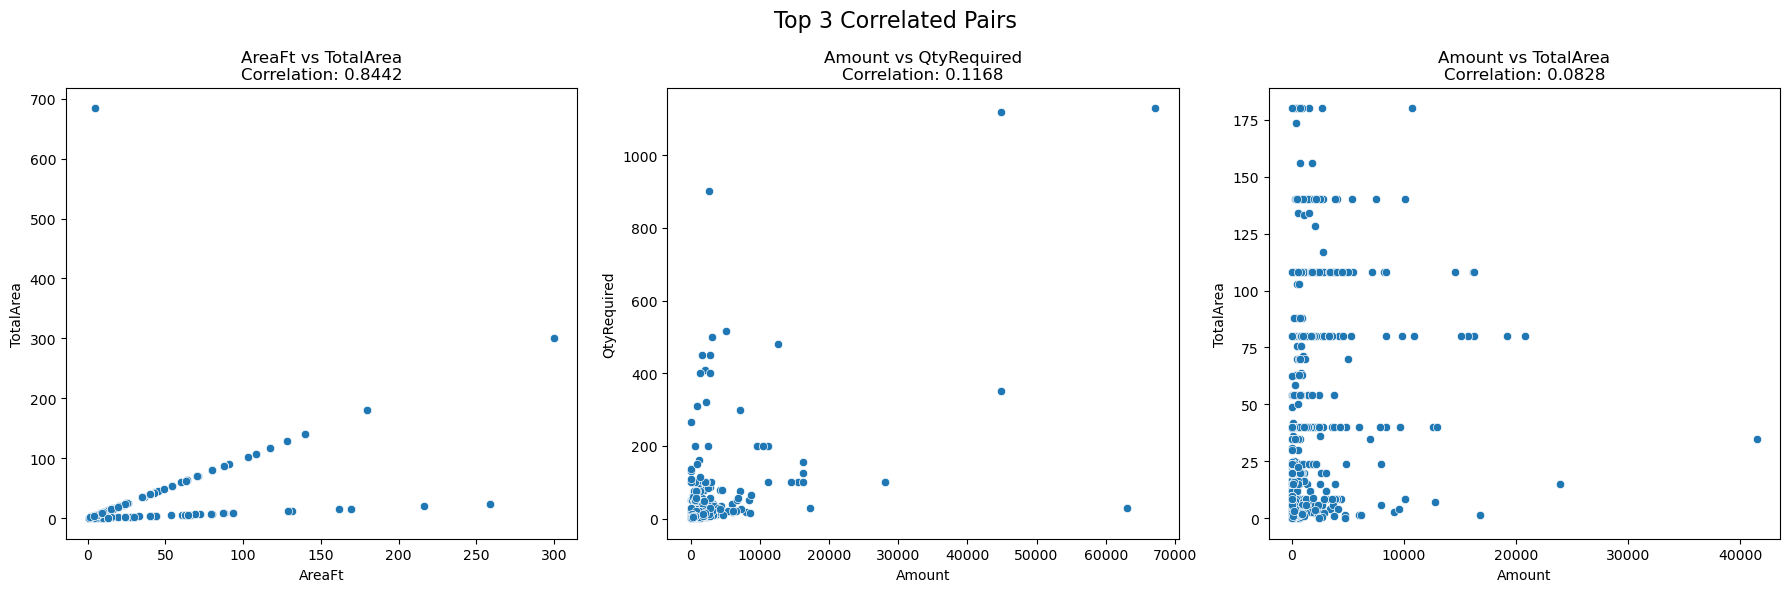

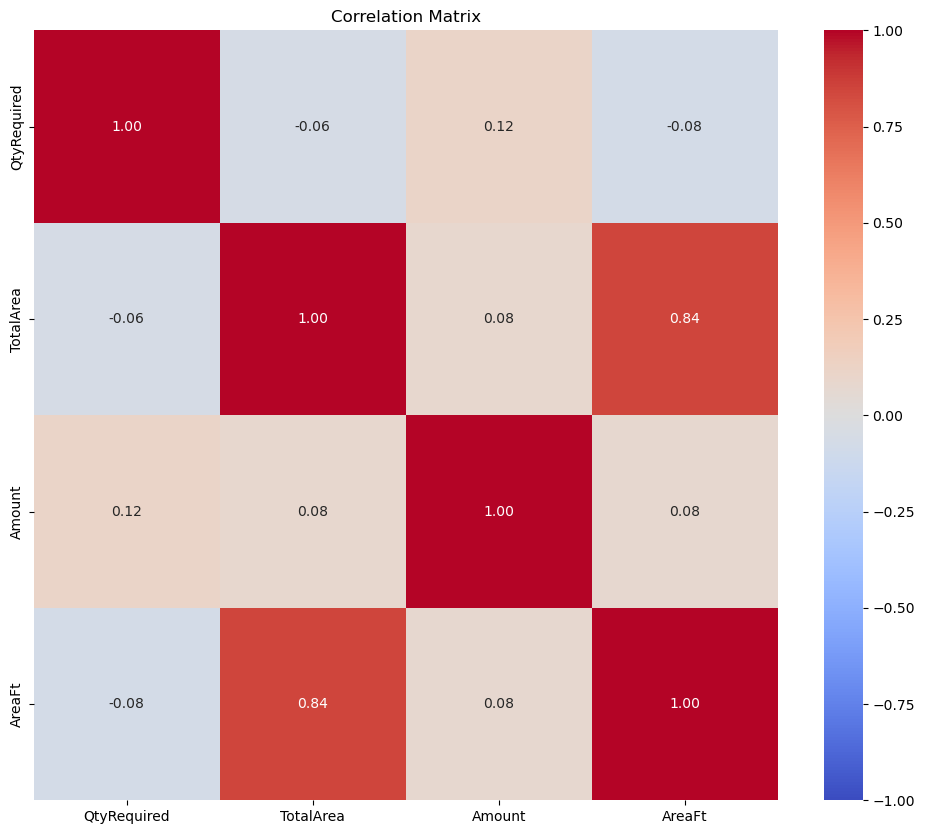

In [49]:
# Performing chi square tests on all Numerical variables and seeing the top 3 values 

numeric_cols = ['QtyRequired', 'TotalArea', 'Amount', 'AreaFt']

numeric_cols = [col for col in numeric_cols if col in RawDataOrder.columns]

# Compute correlation matrix
corr_matrix = RawDataOrder[numeric_cols].corr()

# Get upper triangle of correlation matrix
upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))

# Find the top 3 correlations
top_correlations = upper_tri.unstack().sort_values(kind="quicksort", ascending=False)[:3]

# Print top 3 correlations
print("Top 3 correlated pairs:")
for (col1, col2), corr in top_correlations.items():
    print(f"{col1} - {col2}: {corr:.4f}")

# Visualize top 3 correlations
fig, axes = plt.subplots(1, 3, figsize=(18, 6))
fig.suptitle("Top 3 Correlated Pairs", fontsize=16)

for i, ((col1, col2), corr) in enumerate(top_correlations.items()):
    sns.scatterplot(data=RawDataOrder.sample(1000), x=col1, y=col2, ax=axes[i])  # Sample 1000 points for faster plotting
    axes[i].set_title(f"{col1} vs {col2}\nCorrelation: {corr:.4f}")

plt.tight_layout()
plt.show()

# Correlation matrix heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0, fmt='.2f')
plt.title("Correlation Matrix")
plt.show()


In [ ]:
# Identify categorical and numerical columns
categorical_columns = RawDataOrder.select_dtypes(include=['object', 'category']).columns.tolist()
numerical_columns = RawDataOrder.select_dtypes(include=[np.number]).columns.tolist()

# List to store results of statistical tests
test_results = []

# Function to check if variance is too low (i.e., nearly identical values)
def has_low_variance(series):
    return series.var() < 1e-6  # Threshold for low variance

# Loop through all combinations of categorical and numerical columns
for cat_col in categorical_columns:
    for num_col in numerical_columns:
        # Check if the categorical variable is binary or multi-level
        if RawDataOrder[cat_col].nunique() == 2:
            # Perform T-Test for binary categorical variables
            group1 = RawDataOrder[RawDataOrder[cat_col] == RawDataOrder[cat_col].unique()[0]][num_col]
            group2 = RawDataOrder[RawDataOrder[cat_col] == RawDataOrder[cat_col].unique()[1]][num_col]
            
            # Skip if either group has low variance
            if has_low_variance(group1) or has_low_variance(group2):
                continue
            
            t_stat, p_value = stats.ttest_ind(group1, group2)
            test_type = 'T-Test'
        else:
            # Perform ANOVA for multi-level categorical variables
            groups = [RawDataOrder[RawDataOrder[cat_col] == category][num_col] for category in RawDataOrder[cat_col].unique()]
            
            # Skip if any group has low variance
            if any(has_low_variance(group) for group in groups):
                continue
            
            f_stat, p_value = stats.f_oneway(*groups)
            test_type = 'ANOVA'
        
        # Store the results
        test_results.append({
            'Categorical Variable': cat_col,
            'Numerical Variable': num_col,
            'P-value': p_value,
            'Test Type': test_type
        })

# Convert results to a DataFrame for easier sorting and viewing
results_df = pd.DataFrame(test_results)

# Sort by P-value to find the top 3 pairs with the strongest association (smallest p-values)
top_3_pairs = results_df.sort_values(by='P-value').head(3)

# Display the top 3 pairs with their respective test type and p-values
print(top_3_pairs)

# Analysis of Top 3 Relationships

In this analysis, we explore the top 3 relationships across **Categorical-Categorical**, **Numerical-Numerical**, and **Categorical-Numerical** variable pairs based on statistical tests and correlation measures.

---

## 1. Top 3 Categorical-Categorical Pairs

The following table lists the top 3 pairs of categorical variables based on the Chi-Square test results:

| **Variable Pair**                | **Chi2 Statistic** | **P-value** | **Degrees of Freedom** |
|----------------------------------|-------------------|-------------|------------------------|
| **DesignName vs ColorName**      | 6.514634e+06      | 0.0         | 1,833,942              |
| **QualityName vs DesignName**    | 4.829016e+06      | 0.0         | 858,393                |
| **QualityName vs ColorName**     | 1.375436e+06      | 0.0         | 310,134                |

These pairs show a strong association between the respective categorical variables.

---

## 2. Top 3 Numerical-Numerical Pairs

The following table lists the top 3 correlated numerical variable pairs based on Pearson's correlation coefficient:

| **Numerical Pair**               | **Correlation Coefficient** |
|----------------------------------|-----------------------------|
| **AreaFt vs TotalArea**          | 0.8442                      |
| **Amount vs QtyRequired**        | 0.1168                      |
| **Amount vs TotalArea**          | 0.0828                      |

These correlations indicate the strength and direction of linear relationships between numerical variables.

---

## 3. Top 3 Categorical-Numerical Pairs

The following table lists the top 3 relationships between categorical and numerical variables based on statistical tests (T-Test or ANOVA):

| **Categorical Variable**         | **Numerical Variable**       | **P-value**          | **Test Type** |
|----------------------------------|------------------------------|----------------------|---------------|
| **OrderCategory**                | TotalArea                    | 0.000000e+00         | T-Test        |
| **OrderCategory**                | AreaFt                       | 0.000000e+00         | T-Test        |
| **ITEM_NAME**                    | AreaFt                       | 7.503166e-261        | ANOVA         |

These results show significant relationships between categorical and numerical variables.

---

### Conclusion

- The Chi-Square test results for categorical-categorical pairs indicate strong associations between design names, quality names, and color names.
- The Pearson correlation coefficients for numerical-numerical pairs reveal a strong positive correlation between `AreaFt` and `TotalArea`.
- The T-Test and ANOVA results for categorical-numerical pairs highlight significant differences in `TotalArea` and `AreaFt` across different categories.

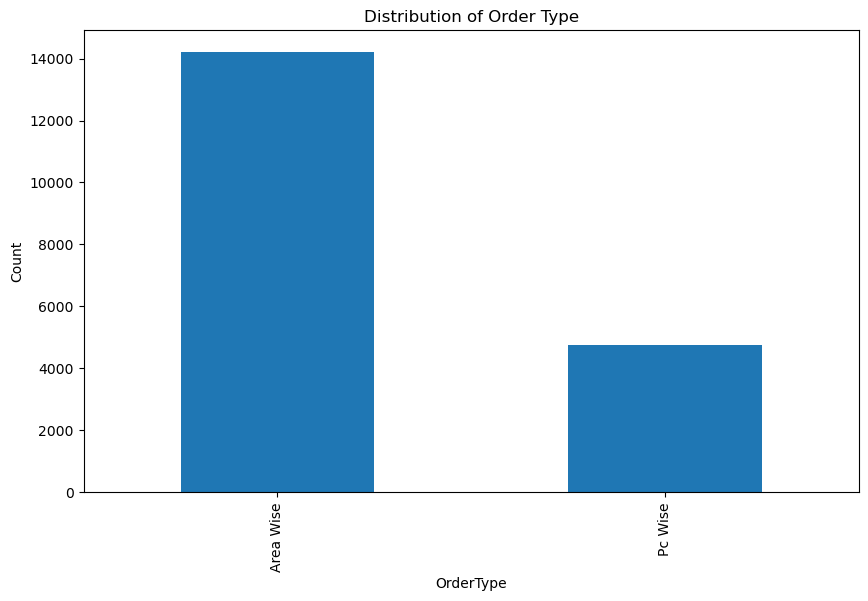

In [51]:
# Let us create some visualizations 
plt.figure(figsize=(10, 6))
RawDataOrder['OrderType'].value_counts().plot(kind='bar')
plt.title('Distribution of Order Type')
plt.xlabel('OrderType')
plt.ylabel('Count')
plt.show()

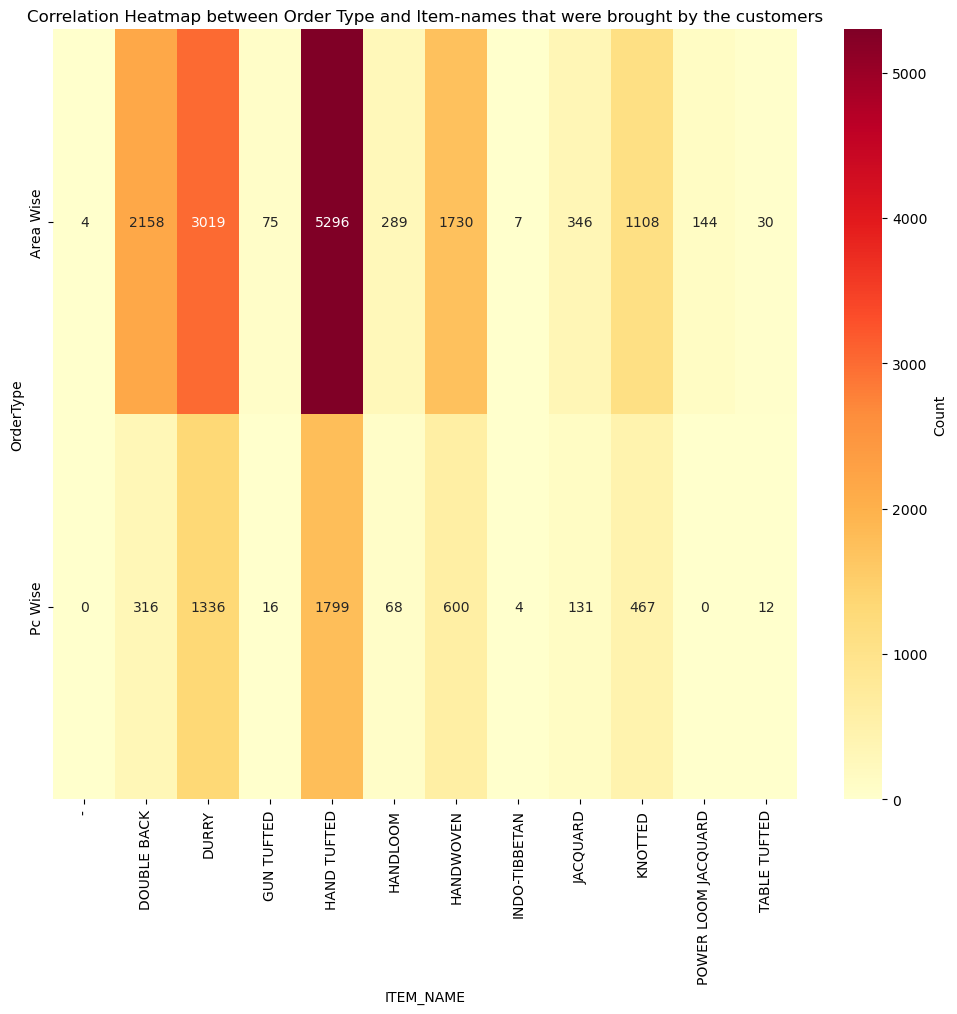

In [52]:
# After Observing in the previous data I observe two order types
# Area Wise and PC Wise trying to test the correlation between Item name and Order Type

#Creating an cross tab for Item name and order type
CrossTab = pd.crosstab(RawDataOrder['OrderType'], RawDataOrder['ITEM_NAME'])

plt.figure(figsize=(12, 10))
sns.heatmap(CrossTab, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Correlation Heatmap between Order Type and Item-names that were brought by the customers')
plt.show()

# So from the heatmap we can make out that Champo Carpets can actually stop producing some types of
# items like Gun_Tufted, INDO-TIBETIAN, TABLE TUFTED. They can also remove HANDLOOM, JACQUARD as well

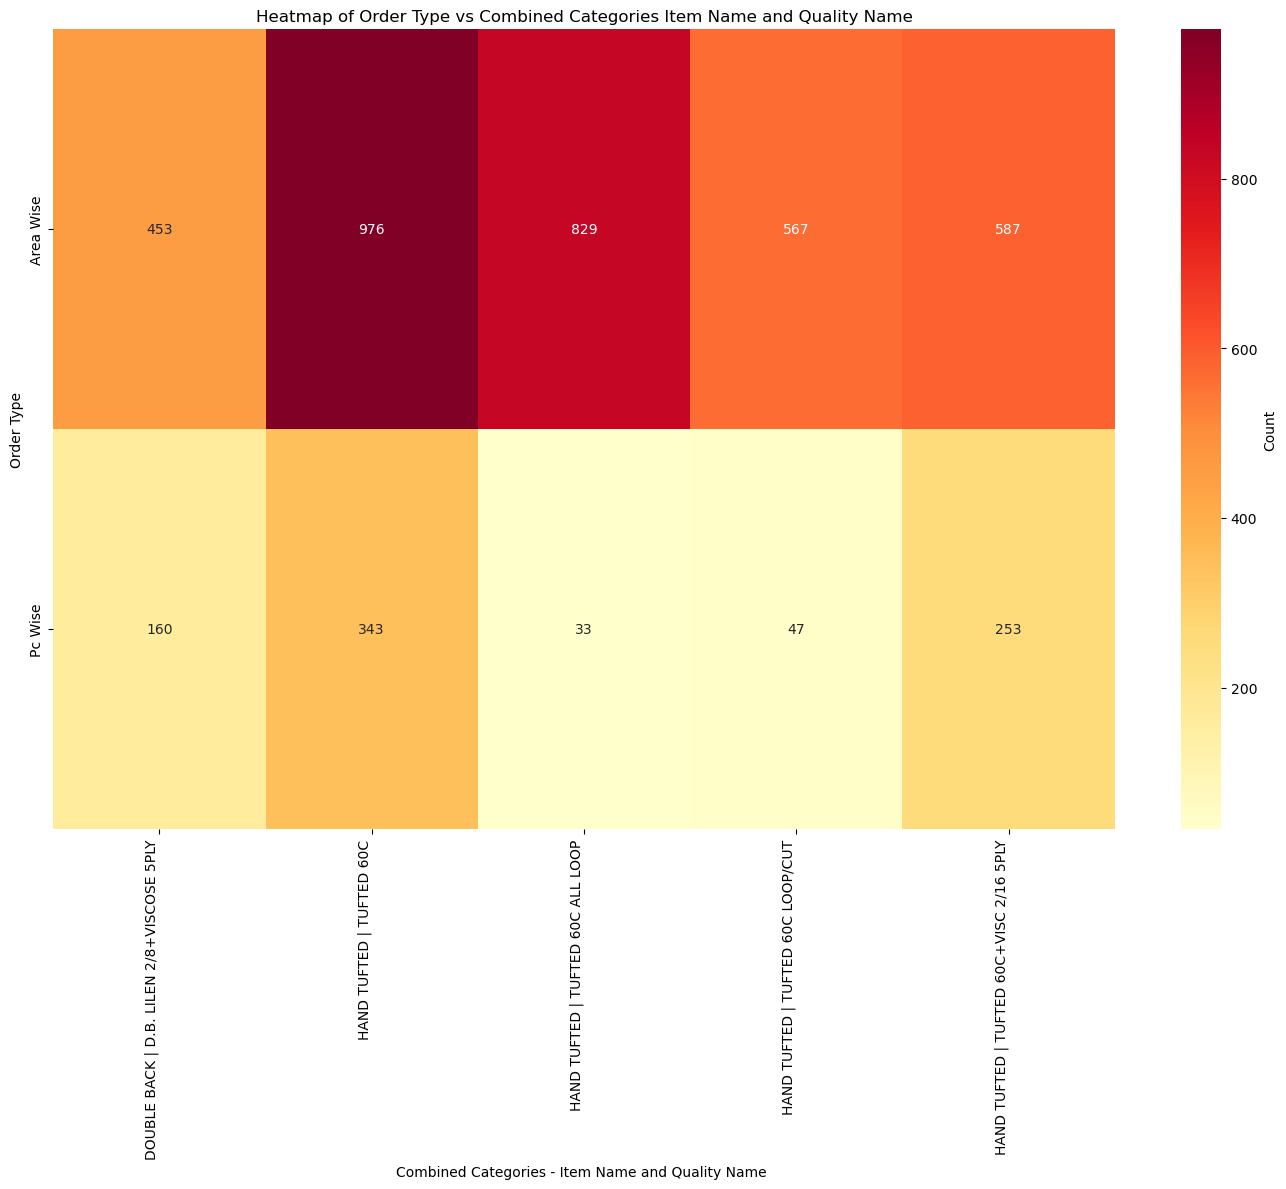

In [53]:
#Creating an cross tab for Item name, Quality Name, Design name, Color and order type
# Concatenate categorical variables into a single column
# Get the top 5 counts for each variable
items_top_5 = RawDataOrder['ITEM_NAME'].value_counts().nlargest(5).index
quality_top_5 = RawDataOrder['QualityName'].value_counts().nlargest(5).index


# Filter the DataFrame to keep only the top 5 entries for each category
filtered_df = RawDataOrder[
    (RawDataOrder['ITEM_NAME'].isin(items_top_5)) & 
    (RawDataOrder['QualityName'].isin(quality_top_5)) 

]

# Create a cross-tabulation for the filtered data
cross_tab_filtered = pd.crosstab(
    filtered_df['OrderType'], 
    filtered_df['ITEM_NAME'] + ' | ' + 
    filtered_df['QualityName'] 
)

# Plot the heatmap for the filtered data
plt.figure(figsize=(14, 12))
sns.heatmap(cross_tab_filtered, annot=True, fmt='d', cmap='YlOrRd', cbar_kws={'label': 'Count'})
plt.title('Heatmap of Order Type vs Combined Categories Item Name and Quality Name')
plt.xlabel('Combined Categories - Item Name and Quality Name ')
plt.ylabel('Order Type')
plt.xticks(rotation=90, ha='right')
plt.tight_layout()
plt.show()

In [54]:
# Applying Linear Regression on the ReData 
X = DataOrderOnly['TotalArea'].values
Y = DataOrderOnly['Amount'].values
X = X.reshape(-1, 1)
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating custom linear regression object
model = LinearRegression()

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 317402798.3984069
R-squared: 0.0035149637000425615


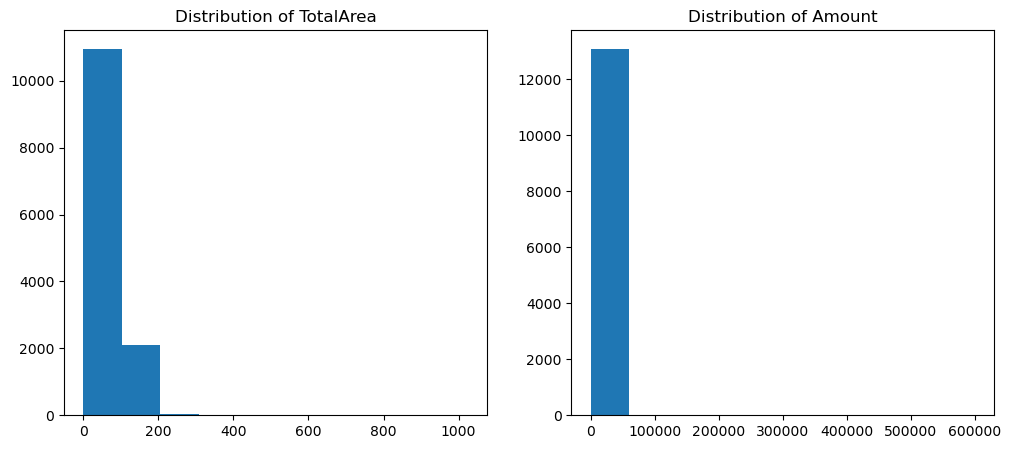

In [55]:
plt.figure(figsize=(12,5))
plt.subplot(121)
plt.hist(DataOrderOnly['TotalArea'])
plt.title('Distribution of TotalArea')
plt.subplot(122)
plt.hist(DataOrderOnly['Amount'])
plt.title('Distribution of Amount')
plt.show()

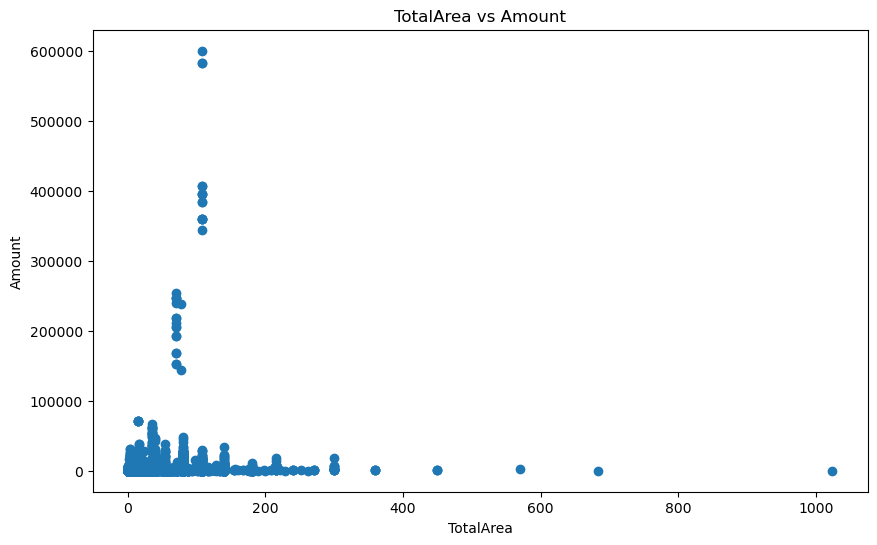

In [56]:
plt.figure(figsize=(10,6))
plt.scatter(DataOrderOnly['TotalArea'], DataOrderOnly['Amount'])
plt.xlabel('TotalArea')
plt.ylabel('Amount')
plt.title('TotalArea vs Amount')
plt.show()

# The below graph shows how the pricing strategy is not so good from champo carpets 
#trying to find out the relationship between Total Area and amount to see how cost of making the carpet is affecting their sales and how much they are spending extra

In [57]:
# Applying log transformation and seeing if mean squared error reduces

# Log transformation
DataOrderOnly['LogTotalArea'] = np.log1p(DataOrderOnly['TotalArea'])
DataOrderOnly['LogAmount'] = np.log1p(DataOrderOnly['Amount'])

# Use log-transformed features
X = DataOrderOnly['LogTotalArea'].values.reshape(-1, 1)
Y = DataOrderOnly['LogAmount'].values

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

# Creating linear regression model
model = LinearRegression()

# Fit model
model.fit(X_train, y_train)

# Predictions
y_pred = model.predict(X_test)

# Calculate metrics
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 4.016929413574044
R-squared: 0.05098532070423256


In [58]:
# The relationship between Total Area and Amount seems to be highly skewed and non-linear
#So trying to implement decsision trees to see the relationship to provide recommendations

# Create and fit the Decision Tree model
tree_model = DecisionTreeRegressor(random_state=42)
tree_model.fit(X_train, y_train)

# Make predictions
y_pred = tree_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared: {r2}")

Mean Squared Error: 3.4349848842413935
R-squared: 0.18847190411451165
